In [107]:
import random
import numpy as np

def create_comparison_matrix(n):
    return np.random.choice([-1, 0, 1], size=(n, n))

def compare(a, b, comp_arr):
    global comparison_count
    comparison_count += 1
    if a==b:
        return 0
    elif a>b:
        return -1
    else:
        return 1

def median_of_three(arr, low, high, comp_arr):
    mid = (low + high) // 2
    if compare(arr[high], arr[low], comp_arr) < 0:
        arr[low], arr[high] = arr[high], arr[low]
    if compare(arr[mid], arr[low], comp_arr) < 0:
        arr[low], arr[mid] = arr[mid], arr[low]
    if compare(arr[high], arr[mid], comp_arr) < 0:
        arr[mid], arr[high] = arr[high], arr[mid]
    return mid

def partition(arr, low, high, comp_arr):
    pivot_index = median_of_three(arr, low, high, comp_arr)
    pivot = arr[pivot_index]
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
    
    left = low
    right = high - 1
    i = low
    
    while i <= right:
        comp_result = compare(arr[i], pivot, comp_arr)
        if comp_result < 0:
            arr[left], arr[i] = arr[i], arr[left]
            left += 1
            i += 1
        elif comp_result > 0:
            arr[i], arr[right] = arr[right], arr[i]
            right -= 1
        else:
            i += 1
    
    arr[right + 1], arr[high] = arr[high], arr[right + 1]
    return left, right + 1

def partition_3div(A, start, end, pivot_idx, comp_arr):
    assert end <= len(A)
    left = []
    middle = []
    right = []
    pivot = A[pivot_idx]
    for i in range(start, end):
        if i==pivot_idx:
            middle.append(A[i])
            continue

        comp = compare(pivot, A[i], comp_arr)
        if comp==-1:
            left.append(A[i])
        elif comp==0:
            middle.append(A[i])
        elif comp==1:
            right.append(A[i])

    # print(left, middle, right)
    B = left + middle + right
    A[start:end] = B
    idxs = [0,0,0,0]
    idxs[0] = start
    idxs[1] = idxs[0]+len(left)
    idxs[2] = idxs[1]+len(middle)
    idxs[3] = idxs[2]+len(right)
    return idxs



def partial_quicksort(arr, low, high, k, comp_arr):
    # print("Partial Sort:", arr[low:high])
    div_index = partition_3div(arr, low, high, low, comp_arr)
    for i in range(3):
        if i==1:
            continue #Middle領域
        if div_index[i]<k:
            if div_index[i+1]-div_index[i] >=2:
                partial_quicksort(arr, div_index[i], div_index[i+1], k, comp_arr)


global comparison_count
comparison_count = 0

# テスト用の配列
n = 15
arr = [random.randint(1,n) for _ in range(n)]
# arr = list(range(n))
random.shuffle(arr)
sorted_arr = sorted(arr)
k = 5 # k番目に小さい要素を求める

comp_arr = create_comparison_matrix(n)

print("元の配列:", arr)
# print("比較行列:")
# print(comp_arr)

partial_quicksort(arr, 0, len(arr), k, comp_arr)

print(f"{k}番目に小さい要素: {arr[k-1]}")
print(f"部分ソート後の配列: {arr}")
print(f"総比較回数: {comparison_count}")
# debug
assert len(arr)==n
assert sorted_arr[:k]==arr[:k]


元の配列: [3, 11, 7, 12, 6, 6, 3, 12, 13, 5, 7, 3, 5, 6, 14]
5番目に小さい要素: 5
部分ソート後の配列: [3, 3, 3, 5, 5, 6, 6, 6, 7, 7, 11, 12, 12, 13, 14]
総比較回数: 36


In [113]:
# N, Kのありうる組について、100回ずつ試行して、カウント回数を記録
import numpy as np
import pandas as pd


comp_arr = create_comparison_matrix(n)

def run_experiment(n, k):
    global comparison_count
    comparison_count = 0
    
    arr = [random.randint(1,n) for _ in range(n)]
    # random.shuffle(arr)
    
    partial_quicksort(arr, 0, len(arr), k, comp_arr)
        
    return comparison_count

def analyze_performance(n, k, num_trials=100):
    results = [run_experiment(n, k) for _ in range(num_trials)]
    mean = np.mean(results)
    std_dev = np.std(results)
    return mean, std_dev

mean_performance = {}
std_performance = {}

# for n in range(5, 100):
n = 50
means = []
stds = []
for k in range(1, n):
    m, s = analyze_performance(n, k)
    means.append(m)
    stds.append(s)






Text(0, 0.5, 'count of comparisons')

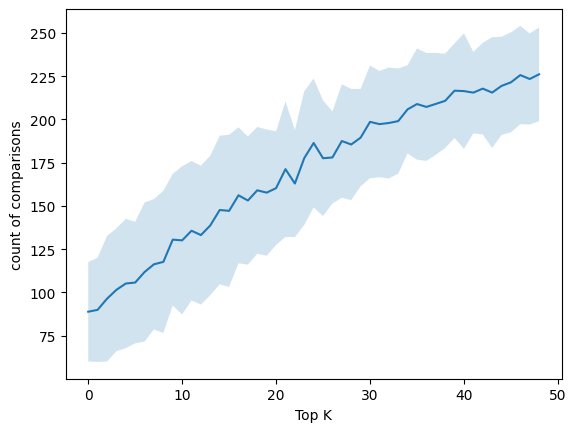

In [116]:
import matplotlib.pyplot as plt

x = np.arange(len(means))
# # 折れ線グラフの描画
# plt.errorbar(x, means, yerr=stds, capsize=10, marker='o', linestyle='-')
# 上限と下限の計算
y_upper = [mean + std for mean, std in zip(means, stds)]
y_lower = [mean - std for mean, std in zip(means, stds)]

# 折れ線グラフと帯の描画
plt.plot(x, means, marker='', linestyle='-')
plt.fill_between(x, y_lower, y_upper, alpha=0.2)

plt.xlabel("Top K")
plt.ylabel("count of comparisons")

In [125]:

import numpy as np

maxN = 200
maxK = 100

CountArr = np.zeros(shape=(maxN+1, maxK+1))


for n in range(1, maxN+1):
    print(f"n: {n}")
    for k in range(1, min(n+1, maxK)):
        if n>100:
            m, s = analyze_performance(n, k, num_trials=10)
        else:            
            m, s = analyze_performance(n, k)
        CountArr[n, k] = m + 0.5*s


n: 1
n: 2
n: 3
n: 4
n: 5
n: 6
n: 7
n: 8
n: 9
n: 10
n: 11
n: 12
n: 13
n: 14
n: 15
n: 16
n: 17
n: 18
n: 19
n: 20
n: 21
n: 22
n: 23
n: 24
n: 25
n: 26
n: 27
n: 28
n: 29
n: 30
n: 31
n: 32
n: 33
n: 34
n: 35
n: 36
n: 37
n: 38
n: 39
n: 40
n: 41
n: 42
n: 43
n: 44
n: 45
n: 46
n: 47
n: 48
n: 49
n: 50
n: 51
n: 52
n: 53
n: 54
n: 55
n: 56
n: 57
n: 58
n: 59
n: 60
n: 61
n: 62
n: 63
n: 64
n: 65
n: 66
n: 67
n: 68
n: 69
n: 70
n: 71
n: 72
n: 73
n: 74
n: 75
n: 76
n: 77
n: 78
n: 79
n: 80
n: 81
n: 82
n: 83
n: 84
n: 85
n: 86
n: 87
n: 88
n: 89
n: 90
n: 91
n: 92
n: 93
n: 94
n: 95
n: 96
n: 97
n: 98
n: 99
n: 100
n: 101
n: 102
n: 103
n: 104
n: 105
n: 106
n: 107
n: 108
n: 109
n: 110
n: 111
n: 112
n: 113
n: 114
n: 115
n: 116
n: 117
n: 118
n: 119
n: 120
n: 121
n: 122
n: 123
n: 124
n: 125
n: 126
n: 127
n: 128
n: 129
n: 130
n: 131
n: 132
n: 133
n: 134
n: 135
n: 136
n: 137
n: 138
n: 139
n: 140
n: 141
n: 142
n: 143
n: 144
n: 145
n: 146
n: 147
n: 148
n: 149
n: 150
n: 151
n: 152
n: 153
n: 154
n: 155
n: 156
n: 157
n: 158
n:

In [126]:
# JSONファイルに出力
import json

def create_json_file(N, K, data):
  """
  N×Kの整数配列をJSONファイルに変換する関数

  Args:
    N: nの最大値
    K: kの最大値
    data: N×Kの整数配列
  """

  # JSONデータの作成
  json_data = []
  for n in range(1, N + 1):
    for k in range(1, K + 1):
      if data[n-1, k-1]>1:
        json_data.append({"n": n, "k": k, "value": int(data[n-1, k-1])})

  # JSONファイルへの書き込み
  with open('data.json', 'w') as f:
    json.dump(json_data, f, indent=4)

create_json_file(maxN, maxK, CountArr)
